In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status

Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [1]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [2]:
loaded  = np.load('data/shapes.npz')
images = loaded['images']/255
labels = loaded['labels'][:,0].astype(int)-2

In [3]:
training = 0.9
len_train = int(training*len(images))

train_images = images[:len_train]
train_labels = labels[:len_train]
test_images = images[len_train:]
test_labels = labels[len_train:]

len_train = int(training*len(train_images))
val_images = train_images[len_train:]
val_labels = train_labels[len_train:]
train_images = train_images[:len_train]
train_labels = train_labels[:len_train]

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=images[0].shape),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(400, activation='relu'),
  tf.keras.layers.Dense(200, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 361)               0         
                                                                 
 dense (Dense)               (None, 500)               181000    
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 200)               80200     
                                                                 
 dense_3 (Dense)             (None, 3)                 603       
                                                                 
Total params: 462,203
Trainable params: 462,203
Non-trainable params: 0
_________________________________________________________________


2022-12-04 10:35:06.450816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
hist = model.fit(x=train_images, y=train_labels, epochs=30, batch_size=128,validation_data=(val_images, val_labels))

Epoch 1/30
633/633 [==============================] - 7s 11ms/step - loss: 0.7906 - accuracy: 0.5944 - val_loss: 0.5335 - val_accuracy: 0.7301
Epoch 2/30
633/633 [==============================] - 7s 11ms/step - loss: 0.4145 - accuracy: 0.8175 - val_loss: 0.3133 - val_accuracy: 0.8740
Epoch 3/30
633/633 [==============================] - 7s 12ms/step - loss: 0.2899 - accuracy: 0.8831 - val_loss: 0.2316 - val_accuracy: 0.9074
Epoch 4/30
633/633 [==============================] - 7s 10ms/step - loss: 0.2546 - accuracy: 0.8991 - val_loss: 0.2295 - val_accuracy: 0.9101
Epoch 5/30
633/633 [==============================] - 6s 10ms/step - loss: 0.2282 - accuracy: 0.9113 - val_loss: 0.3093 - val_accuracy: 0.8776
Epoch 6/30
633/633 [==============================] - 6s 10ms/step - loss: 0.2256 - accuracy: 0.9136 - val_loss: 0.2840 - val_accuracy: 0.8819
Epoch 7/30
633/633 [==============================] - 7s 10ms/step - loss: 0.2160 - accuracy: 0.9183 - val_loss: 0.2088 - val_accuracy: 0.9244

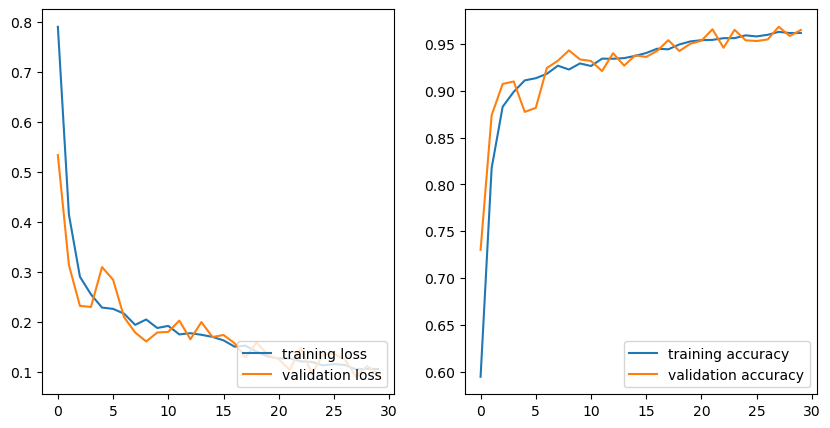

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='lower right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [7]:
train_acc = model.evaluate(train_images, train_labels, batch_size=128)
test_acc= model.evaluate(test_images, test_labels, batch_size=128)

print("training accuracy : %.3f" % (train_acc[1]))
print("test accuracy : %.3f" % (test_acc[1]))

79/79 [==============================] - 0s 5ms/step - loss: 0.0849 - accuracy: 0.9703
training accuracy : 0.971
test accuracy : 0.970


In [49]:
pred = model.predict(test_images, batch_size=128)
pred_labels = np.argmax(pred,1)

fail = np.not_equal(pred_labels,test_labels)
fail_images = test_images[fail]
target_labels = test_labels[fail]
fail_labels = pred_labels[fail]
fail_pred = np.around(pred[fail],2)

img_size = len(images[0])
img_grid = (4,5)
num_grid = img_grid[0]*img_grid[1]

plot = np.zeros((1+(img_size+1)*img_grid[0],1+(img_size+1)*img_grid[1]))

for i, f in enumerate(fail_images[:num_grid]):
    x = i//img_grid[1]
    y = i%img_grid[1]
    plot[1+(img_size+1)*x:1+(img_size+1)*x+img_size,1+(img_size+1)*y:1+(img_size+1)*y+img_size] = f

fig = plt.figure(figsize=(plot.shape[1],plot.shape[0]),dpi=1)
fig.figimage(plot, cmap='gray')
fig.savefig('data/tmp_fails.png')

79/79 [==============================] - 1s 6ms/step


<Figure size 101x81 with 0 Axes>

position : target -> fail : [circle, triangle, square]
(0,0) : 0 -> 2 : [0.18 0.   0.82]
(0,1) : 2 -> 0 : [0.97 0.   0.03]
(0,2) : 0 -> 2 : [0.44 0.   0.56]
(0,3) : 0 -> 2 : [0.27 0.   0.73]
(0,4) : 1 -> 2 : [0.   0.17 0.83]
(1,0) : 0 -> 2 : [0.29 0.   0.71]
(1,1) : 2 -> 1 : [0.   0.98 0.02]
(1,2) : 2 -> 1 : [0.  0.7 0.3]
(1,3) : 1 -> 2 : [0.16 0.   0.84]
(1,4) : 2 -> 0 : [0.95 0.   0.05]
(2,0) : 2 -> 0 : [0.85 0.   0.15]
(2,1) : 2 -> 1 : [0.   0.74 0.26]
(2,2) : 0 -> 2 : [0.08 0.   0.92]
(2,3) : 2 -> 1 : [0.  0.9 0.1]
(2,4) : 2 -> 0 : [0.52 0.   0.48]
(3,0) : 2 -> 0 : [0.83 0.   0.17]
(3,1) : 0 -> 2 : [0.32 0.   0.68]
(3,2) : 2 -> 0 : [0.93 0.   0.07]
(3,3) : 2 -> 1 : [0.   0.69 0.3 ]
(3,4) : 2 -> 1 : [0.   0.97 0.03]


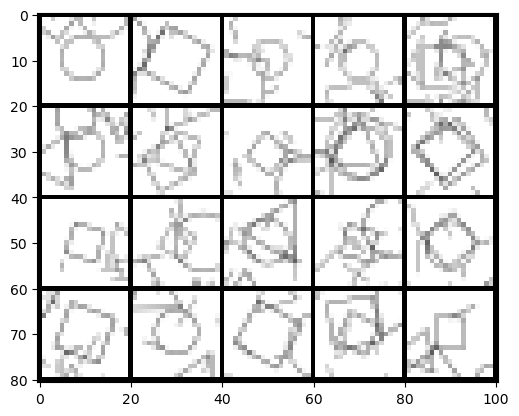

In [53]:
plt.imshow(mpimg.imread('data/tmp_fails.png'))

print("position : target -> fail : [circle, triangle, square]")

for i in range(num_grid):
    x = i//img_grid[1]
    y = i%img_grid[1]
    print(f"({x},{y}) : {target_labels[i]} -> {fail_labels[i]} : {fail_pred[i]}")